In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [51]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [52]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [53]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [54]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [55]:
df.abs().sum()

TV           29408.5
Radio         4652.8
Newspaper     6110.8
Sales         3026.1
dtype: float64

In [56]:
df.aggregate(func="Sales")

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [57]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### I analyze that the highest value of Mean, Std, Max, Mini is Expenditure 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [59]:
df.duplicated().sum()

0

### Exploratory Data Analysis

In [60]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

### First, we check for outliers that can really affect our model

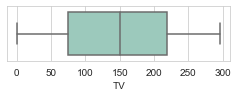

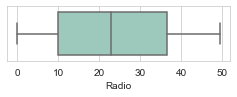

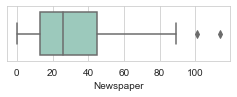

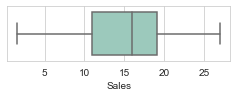

In [61]:
for i in df:
    plt.figure(figsize = (4,1))
    sns.boxplot(x = df[i])
    plt.show()

### No outliers such observed

### Next we'll create a jointplot to compare the TV and Sales columns.



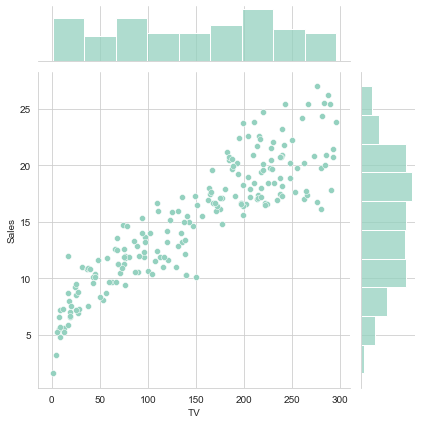

In [62]:
sns.jointplot(x='TV',y='Sales',data=df)

### Doing the same, but with the Radio & Newspaper columns respectively.

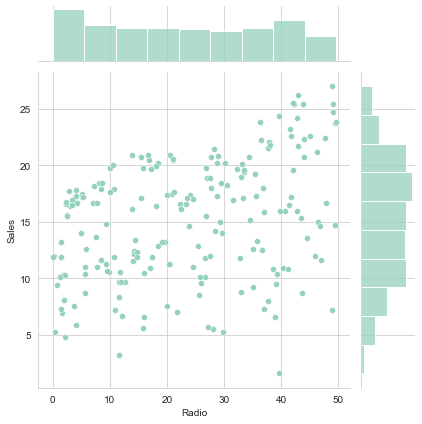

In [63]:
sns.jointplot(x='Radio',y='Sales',data=df)

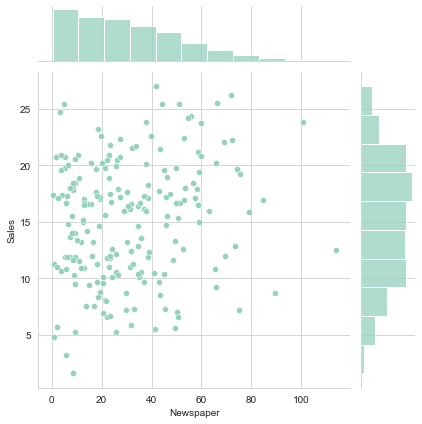

In [64]:
sns.jointplot(x='Newspaper',y='Sales',data=df)

### *Now to explore these features & relationships across the entire data set. Using pairplot**

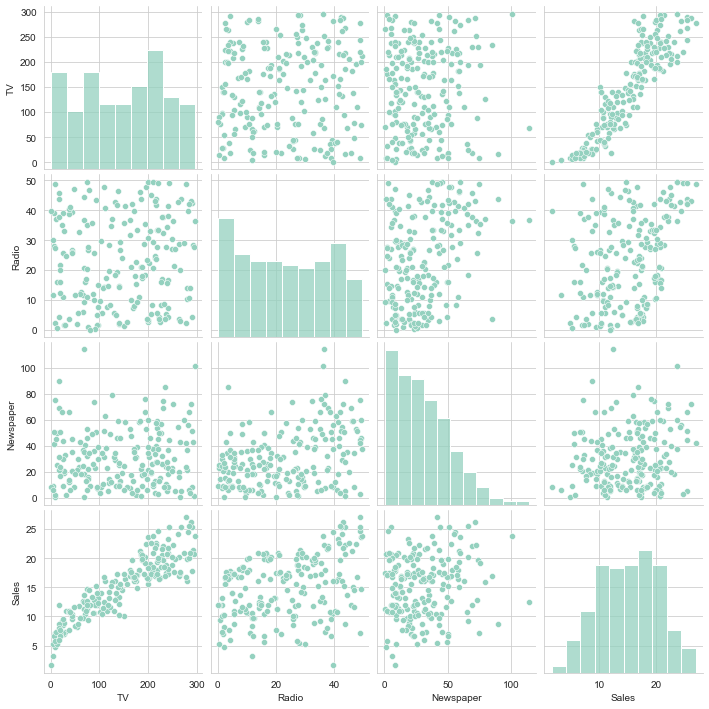

In [65]:
sns.pairplot(df)

### Plotting a univariate distribution of Sales made

<AxesSubplot:xlabel='Sales', ylabel='Density'>

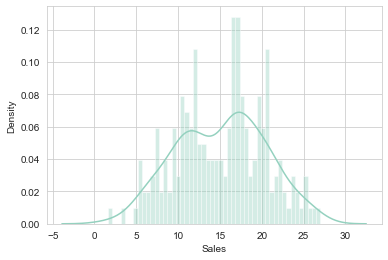

In [66]:
sns.distplot(df['Sales'], bins=50)

In [67]:
corr = df.corr()

<AxesSubplot:>

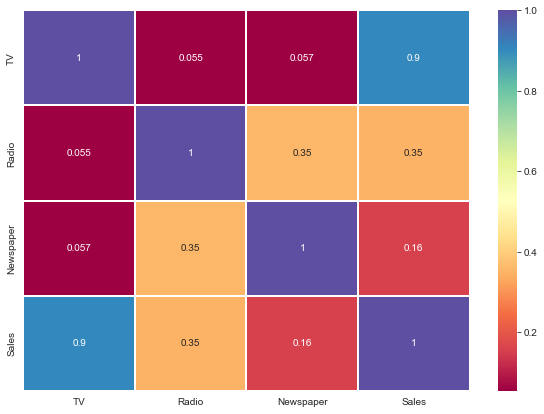

In [68]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='Spectral', linewidths = .2, annot=True)

### Based off these plots what looks to be the most correlated feature with Sales?

In [69]:
# TV is the most correlated feature with Sales


### Creating a linear model plot (using seaborn's lmplot method) of Sale vs TV .

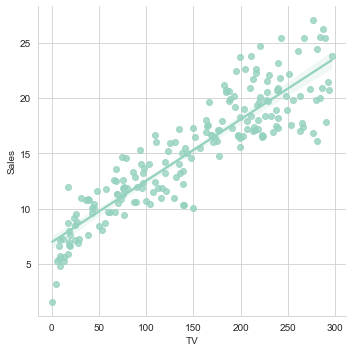

In [70]:
sns.lmplot(x='TV',y='Sales',data=df)

### Model

Dependent and Independent variables
Set a variable X equal to the amounts spent on different adverts (features) and a variable y equal to the "Sales" column.

In [71]:
X = df.iloc[:,0:3]
y = df['Sales'] #target variable

To look at the correlation between each variable

In [72]:
X.iloc[:,0:].corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


### As we see; no exceptionally high correlation is observed, so won't be dropping any columns

 
### Training the Model
Now that we've explored the data a bit, we can go ahead and split the data into training and testing sets.

### Importing model_selection.train_test_split from sklearn to split the data into training and testing sets.



In [74]:
from sklearn.model_selection import train_test_split

### Setting the test_size as 30%



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Importing the LinearRegression from sklearn.linear_model

In [76]:
from sklearn.linear_model import LinearRegression 

### Creating an instance of a LinearRegression() model named model.



In [77]:
model = LinearRegression()

### Train/fit model on the training data.

In [78]:
model.fit(X_train,y_train)

LinearRegression()

### The coefficients of the model



In [79]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
TV,0.053650
Radio,0.110731
Newspaper,0.002037


### 
Predicting Test Data
Now that we have fit/trained our model, we can evaluate its performance by predicting off the test values.

Use lr.predict() to predict off the X_test set of the data.

In [80]:
predictions = model.predict(X_test)

### Let's have some fun and try to predict the sales of a company with their expenditure on ads

In [82]:
lr_model = model.fit(X, y)

In [83]:
# company A spends the following values on advertising on different platforms; 20,10,11
lr_model.predict([[20,10,11]])

array([6.78774421])

### Create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Sales')

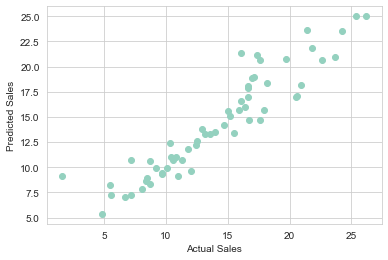

In [84]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

### Evaluating the Model


### We will now evaluate model performance by calculating the residual sum of squares and the explained variance score (R2).

In [86]:
from sklearn import metrics

print('MAE   : ', metrics.mean_absolute_error(y_test, predictions))
print('MSE   : ', metrics.mean_squared_error(y_test, predictions))
print('RMSE  : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE   :  1.3662313868452758
MSE   :  3.938015220480287
RMSE  :  1.9844433024100958


### Residuals
Now we'll explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals, if it looks normally distributed, we're on the right track!

In [87]:
residuals = y_test-predictions

<AxesSubplot:xlabel='Sales', ylabel='Density'>

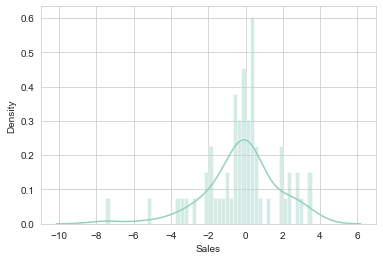

In [88]:
sns.distplot(residuals,bins=50)

### 
Conclusion
We still want to figure out the answer to the original question, do they focus on TV, radio or newspaper ads. We interpret the coefficients to get an idea

In [89]:
coeff_df

,Coefficient
TV,0.053650
Radio,0.110731
Newspaper,0.002037


### How can we interpret these coefficients?

### Interpreting the coefficients, holding all other features fixed;

a 1 unit increase in TV ads is associated with an 0.054930 increase in sales.
a 1 unit increase in Radio ads is associated with a 0.109558 increase in sales.
a 1 unit increase in Newspaper is associated with an 0.006194 decrease in sales.

### Should companies focus more on TV, radio, or newspaper ads?

The companies should focus a bit more on promoting radio ads to see a largaer increase in sales.